# UniTVelo benchmark on dyngen data

Notebook benchmarks velocity and latent time inference using UniTVelo on dyngen-generated data.

## Library imports

In [1]:
import os

import numpy as np
import pandas as pd

import anndata as ad
import scvelo as scv
import unitvelo as utv

from rgv_tools import DATA_DIR
from rgv_tools.benchmarking import get_velocity_correlation

(Running UniTVelo 0.2.5.2)
2024-12-14 00:29:30


2024-12-14 01:29:30.872373: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1734136170.899132 3033118 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1734136170.907750 3033118 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel inst

## General setting

In [2]:
scv.settings.verbosity = 3

In [3]:
velo_config = utv.config.Configuration()
velo_config.R2_ADJUST = True
velo_config.IROOT = None
velo_config.FIT_OPTION = "1"
velo_config.AGENES_R2 = 1
velo_config.GPU = -1

In [4]:
os.environ["TF_USE_LEGACY_KERAS"] = "True"

## Constants

In [5]:
DATASET = "dyngen"

In [6]:
SAVE_DATA = True
if SAVE_DATA:
    (DATA_DIR / DATASET / "results").mkdir(parents=True, exist_ok=True)

## Velocity pipeline

------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/home/icb/weixu.wang/regulatory_velo/RegVelo_reproducibility_simulation.
Results will be stored in res folder
Filtered out 1 genes that are detected 20 counts (shared).
Skip filtering by dispersion since number of variables are less than `n_top_genes`.
Logarithmized X.
Extracted 104 highly variable genes.
Computing moments for 104 genes with n_neighbors: 30 and n_pcs: 30
computing moments based on connectivities
    finished (0:00:00) --> added 
    'Ms' and 'Mu', moments of un/spliced abundances (adata.layers)



/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


# of velocity genes 56 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 56 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 56 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 5338.629, (Spliced): 2711.197, (Unspliced): 2627.432:  67%|██████▋   | 7998/12000 [02:54<01:36, 41.38it/s]  /home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/IPython/core/pylabtools.py:77: DeprecationWarning: backend2gui is deprecated since IPython 8.24, backends are managed in matplotlib and can be externally registered.
  warnings.warn(


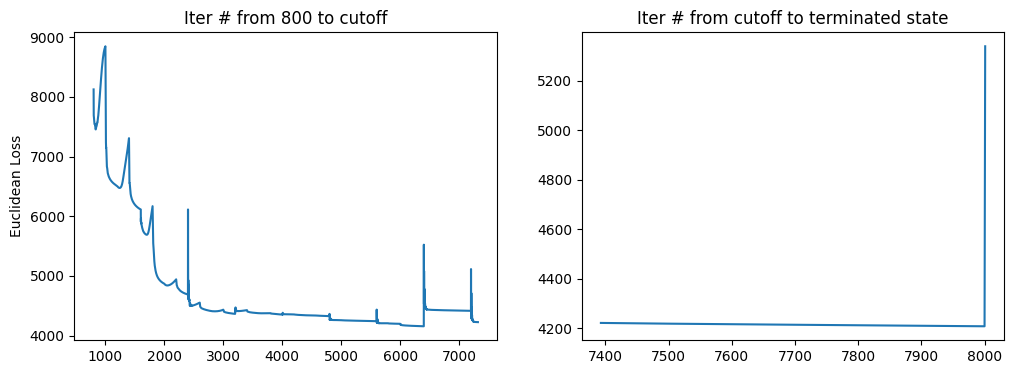

Loss (Total): 5338.629, (Spliced): 2711.197, (Unspliced): 2627.432:  67%|██████▋   | 8001/12000 [02:57<01:28, 45.13it/s]

Total loss 4208.640, vgene loss 5338.629


  0%|          | 0/1000 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/home/icb/weixu.wang/regulatory_velo/RegVelo_reproducibility_simulation.
Results will be stored in res folder
Extracted 59 highly variable genes.
Computing moments for 59 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 29 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 27 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 27 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
Loss (Total): 3988642322.963, (Spliced): 2040639943.111, (Unspliced): 1948002379.852: 100%|█████████▉| 11999/12000 [03:14<00:00, 46.32it/s]

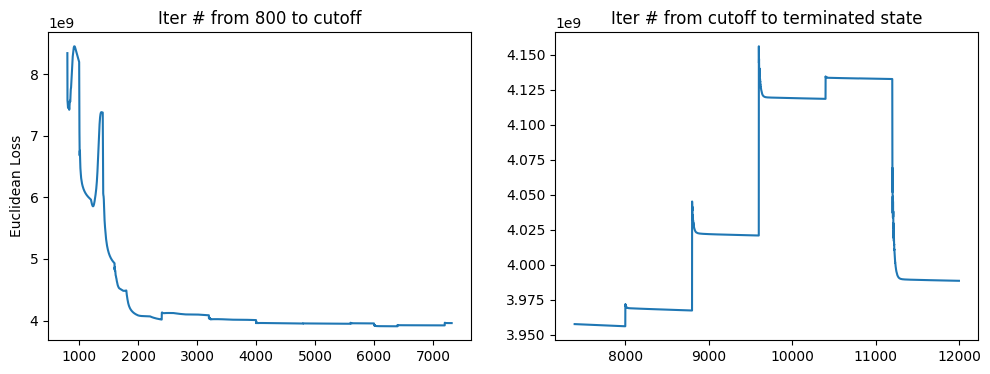

Loss (Total): 3988642322.963, (Spliced): 2040639943.111, (Unspliced): 1948002379.852: 100%|█████████▉| 11999/12000 [03:15<00:00, 61.32it/s]

Total loss 3956149361.778, vgene loss 3988642322.963


  0%|          | 0/400 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/home/icb/weixu.wang/regulatory_velo/RegVelo_reproducibility_simulation.
Results will be stored in res folder


/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 86 highly variable genes.
Computing moments for 86 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 35 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 35 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 35 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 91282.793, (Spliced): 40459.186, (Unspliced): 50823.607:  93%|█████████▎| 11197/12000 [02:57<00:15, 50.50it/s]   

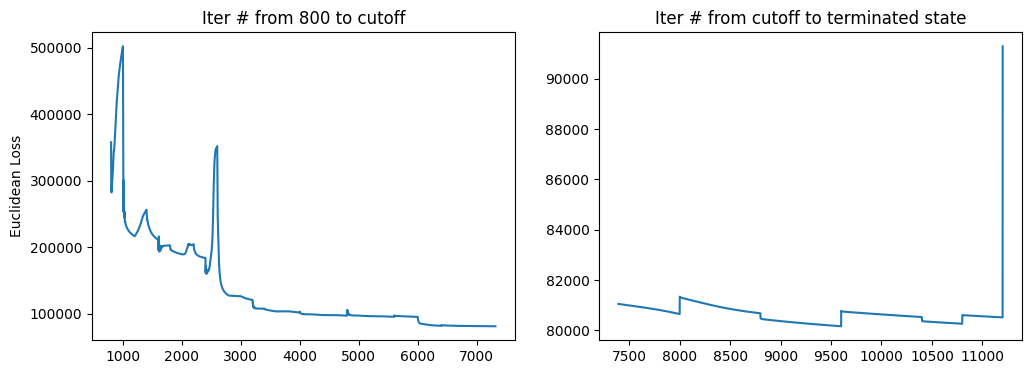

Loss (Total): 91282.793, (Spliced): 40459.186, (Unspliced): 50823.607:  93%|█████████▎| 11201/12000 [02:57<00:12, 62.99it/s]

Total loss 80166.229, vgene loss 91282.793


  0%|          | 0/300 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/home/icb/weixu.wang/regulatory_velo/RegVelo_reproducibility_simulation.
Results will be stored in res folder
Extracted 81 highly variable genes.
Computing moments for 81 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 33 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 33 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 33 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)
Loss (Total): 791.343, (Spliced): 384.566, (Unspliced): 406.777: 100%|█████████▉| 11996/12000 [03:18<00:00, 45.71it/s]   

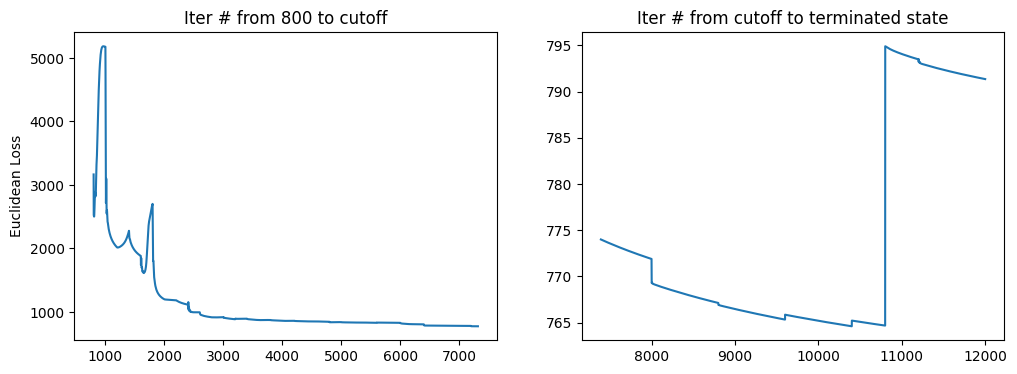

Loss (Total): 791.343, (Spliced): 384.566, (Unspliced): 406.777: 100%|█████████▉| 11999/12000 [03:19<00:00, 60.22it/s]

Total loss 764.614, vgene loss 791.343


  0%|          | 0/300 [00:00<?, ?cells/s]

... storing 'cluster' as categorical


------> Manully Specified Parameters <------
GPU:	-1
------> Model Configuration Settings <------
N_TOP_GENES:	2000
LEARNING_RATE:	0.01
FIT_OPTION:	1
DENSITY:	SVD
REORDER_CELL:	Soft_Reorder
AGGREGATE_T:	True
R2_ADJUST:	True
GENE_PRIOR:	None
VGENES:	basic
IROOT:	None
--------------------------------------------

Current working dir is /ictstr01/home/icb/weixu.wang/regulatory_velo/RegVelo_reproducibility_simulation.
Results will be stored in res folder


/home/icb/weixu.wang/miniconda3/envs/regvelo_test/lib/python3.10/site-packages/scvelo/preprocessing/utils.py:705: DeprecationWarning: `log1p` is deprecated since scVelo v0.3.0 and will be removed in a future version. Please use `log1p` from `scanpy.pp` instead.
  log1p(adata)


Extracted 80 highly variable genes.
Computing moments for 80 genes with n_neighbors: 30 and n_pcs: 30

# of velocity genes 33 (Criterion: positive regression coefficient between un/spliced counts)
# of velocity genes 33 (Criterion: std of un/spliced reads should be moderate, w/o extreme values)
# of velocity genes 33 (Criterion: genes have reads in more than 5% of total cells)
No GPU device has been detected. Switch to CPU mode.


Loss (Total): 11720.607, (Spliced): 5884.346, (Unspliced): 5836.261:  71%|███████▏  | 8558/12000 [02:12<01:05, 52.28it/s]  

In [ ]:
velocity_correlation = []

for filename in (DATA_DIR / DATASET / "processed").iterdir():
    if filename.suffix != ".zarr":
        continue

    adata = ad.io.read_zarr(filename)
    adata.var["highly_variable"] = True

    adata.obs["cluster"] = "0"
    adata = utv.run_model(adata, label="cluster", config_file=velo_config)

    velocity_correlation.append(
        get_velocity_correlation(
            ground_truth=adata.layers["true_velocity"], estimated=adata.layers["velocity"], aggregation=np.mean
        )
    )

## Data saving

In [9]:
if SAVE_DATA:
    pd.DataFrame({"velocity": velocity_correlation}).to_parquet(
        path=DATA_DIR / DATASET / "results" / "unitvelo_correlation.parquet"
    )